# penguins_BN stacking

Training on penguins dataset using bayesian_network model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declare real dataset and split into train/test

In [2]:
# Read penguins data
penguins_real = pd.read_csv("Data\penguins_size.csv")
penguins_real = penguins_real.dropna()
gen_method = "bayesian_network"
target = "species"

In [3]:
# Split penguins data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_real, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv("Data\penguins_train.csv", index=False)
penguins_test.to_csv("Data\penguins_test.csv", index=False)

In [3]:
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = penguins_real.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v1.csv", key="synth")

[2024-05-07T08:39:45.756224+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              40.9             13.7   
1       Adelie      Dream              37.3             17.8   
2       Gentoo     Biscoe              50.0             15.9   
3       Adelie     Biscoe              35.9             19.2   
4       Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
262  Chinstrap      Dream              50.9             19.1   
263     Adelie  Torgersen              37.2             19.4   
264     Adelie     Biscoe              39.7             17.7   
265     Gentoo     Biscoe              45.5             15.0   
266     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                214.0       4650.0  FEMALE  
1                191.0       3350.0  FEMALE  
2                224.0       5350.0    MALE  
3                189.0       3800.0 

# syn_v2

In [5]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate real and synthesized data
penguins_stack = pd.concat([penguins_real, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v1.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v1_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v1_test.csv", index=False)

In [6]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v2.csv", key="synth")

[2024-05-07T08:42:02.325740+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
235     Gentoo     Biscoe              45.1             14.5   
399  Chinstrap      Dream              41.1             20.6   
602     Adelie      Dream              35.7             17.1   
61      Adelie     Biscoe              41.1             19.1   
145     Adelie      Dream              41.5             18.5   
..         ...        ...               ...              ...   
71      Adelie  Torgersen              37.2             19.4   
106     Adelie     Biscoe              39.7             17.7   
270     Gentoo     Biscoe              45.5             15.0   
435     Adelie     Biscoe              39.6             19.9   
102     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
235              215.0       5000.0  FEMALE  
399              200.2       4005.5    MALE  
602              185.9       3237.3  FEMALE  
61               188.0       4100.0 

# syn_v3

In [7]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v2.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v2_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v2_test.csv", index=False)

In [8]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v3.csv", key="synth")

[2024-05-07T08:42:03.111890+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1112  Chinstrap      Dream              45.5             19.4   
966      Gentoo      Dream              56.9             20.4   
598      Gentoo     Biscoe              45.2             15.8   
170   Chinstrap      Dream              46.7             17.9   
275      Gentoo     Biscoe              45.7             13.9   
...         ...        ...               ...              ...   
1095     Adelie      Dream              39.8             18.4   
1130     Adelie      Dream              36.4             18.3   
1294     Gentoo     Biscoe              51.0             14.8   
860      Adelie  Torgersen              38.6             20.4   
1126     Gentoo     Biscoe              46.6             13.6   

      flipper_length_mm  body_mass_g     sex  
1112              187.8       3516.6  FEMALE  
966               210.1       6263.6    MALE  
598               211.0       4522.5    MALE  
170               19

# syn_v4

In [9]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v3.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v3_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v4.csv", key="synth")

[2024-05-07T08:42:04.150832+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1011     Adelie      Dream              36.6             16.6   
1273  Chinstrap      Dream              41.7             19.9   
69       Adelie  Torgersen              42.8             18.5   
2539     Gentoo     Biscoe              49.4             14.5   
942   Chinstrap      Dream              43.3             16.0   
...         ...        ...               ...              ...   
1638  Chinstrap      Dream              52.0             20.3   
1095     Adelie      Dream              39.8             18.4   
1130     Adelie      Dream              36.4             18.3   
1294     Gentoo     Biscoe              51.0             14.8   
860      Adelie  Torgersen              38.6             20.4   

      flipper_length_mm  body_mass_g     sex  
1011              183.9       2951.3  FEMALE  
1273              202.6       4163.3    MALE  
69                195.0       4250.0    MALE  
2539              22

# syn_v5

In [11]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v4.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v4_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v5.csv", key="synth")

[2024-05-07T08:42:05.642860+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
5054  Chinstrap  Torgersen              43.1             18.4   
120      Adelie  Torgersen              38.8             17.6   
2351     Adelie     Biscoe              39.5             17.1   
1907     Adelie     Biscoe              36.7             19.3   
3648     Adelie      Dream              49.8             20.9   
...         ...        ...               ...              ...   
3092     Gentoo     Biscoe              49.4             16.4   
3772  Chinstrap      Dream              40.3             16.8   
5191  Chinstrap      Dream              46.5             17.5   
5226     Adelie      Dream              33.9             17.4   
860      Adelie  Torgersen              38.6             20.4   

      flipper_length_mm  body_mass_g     sex  
5054              185.8       3465.6  FEMALE  
120               191.0       3275.0  FEMALE  
2351              201.7       4011.2  FEMALE  
1907              19

# stack_v5 - Final stack

In [13]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v5.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v5_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(penguins_train).Train(plugin=gen_method)

[2024-05-07T08:42:07.868069+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


# stack_v5 (synth only)

In [15]:
# Remove the first 334 rows, equal to the real data, from stack_v5
penguins_stack_synth_only = penguins_stack.iloc[334:, :]

# Save to csv
penguins_stack_synth_only.to_csv(f"{gen_method}\penguins_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_synth_only_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(penguins_train).Train(plugin=gen_method)

[2024-05-07T08:42:10.155124+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
9876      Adelie     Biscoe              38.1             19.5   
10068     Gentoo     Biscoe              46.8             15.0   
10316     Adelie      Dream              35.6             16.9   
8622      Gentoo     Biscoe              44.7             13.8   
8994      Gentoo     Biscoe              47.2             15.8   
...          ...        ...               ...              ...   
5734      Adelie  Torgersen              38.2             17.5   
5191   Chinstrap      Dream              46.5             17.5   
5390   Chinstrap      Dream              50.4             19.2   
860       Adelie  Torgersen              38.6             20.4   
7270   Chinstrap      Dream              39.4             18.6   

       flipper_length_mm  body_mass_g     sex  
9876               195.4       3790.5  FEMALE  
10068              216.2       4965.4  FEMALE  
10316              184.7       5804.2  FEMALE  
8622

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':          species  island  culmen_length_mm  culmen_depth_mm  \
1381   Chinstrap   Dream              57.6             21.5   
7695      Adelie  Biscoe              40.6             17.8   
10167     Gentoo  Biscoe              48.4             15.6   
5550      Gentoo  Biscoe              47.4             14.1   
1100      Adelie   Dream              43.7             18.6   
...          ...     ...               ...              ...   
6068      Adelie  Biscoe              37.8             17.8   
5525      Gentoo  Biscoe              39.6             13.5   
5724   Chinstrap   Dream              41.6             17.2   
1194      Gentoo  Biscoe              44.8             13.7   
7604   Chinstrap   Dream              45.6             18.8   

       flipper_length_mm  body_mass_g     sex  
1381               210.4       4697.2    MALE  
7695               194.1       3340.4  FEMALE  
10167              216.0       5166.3    MALE  
5550               201.4       4503.3   

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [4]:
# Read train and test data (this is base/real train and test data, not the stack data)
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Count of penguins_real
real_count = penguins_real.shape[0]

# Read syn_v1 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_real = S.evaluate(penguins_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.004826,0.009297,0.995174,0.009297
1,pca_eigval_diff,u,0.110534,NaN,0.889466,NaN
2,pca_eigvec_ang,u,0.120486,NaN,0.961648,NaN
3,avg_cio,u,0.815728,0.029411,0.815728,0.029411
4,corr_mat_diff,u,0.948979,NaN,0.954811,NaN
5,mutual_inf_diff,u,0.784344,NaN,0.962650,NaN
6,ks_tvd_stat,u,0.045749,0.006011,0.954251,0.006011
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.013485,0.007444,0.986515,0.007444
9,avg_pMSE,u,0.004500,0.000535,0.982000,0.002140


# Eval on syn_2

In [5]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v2_sample.csv", index=False)

In [6]:
# Read syn_v2 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v2_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v1 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.011776,0.009395,0.988224,0.009395
1,pca_eigval_diff,u,0.135265,NaN,0.864735,NaN
2,pca_eigvec_ang,u,0.137697,NaN,0.956170,NaN
3,avg_cio,u,0.569131,0.111396,0.569131,0.111396
4,corr_mat_diff,u,1.177276,NaN,0.943939,NaN
5,mutual_inf_diff,u,0.799544,NaN,0.961926,NaN
6,ks_tvd_stat,u,0.055224,0.010075,0.944776,0.010075
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.011544,0.007057,0.988456,0.007057
9,avg_pMSE,u,0.002829,0.000473,0.988684,0.001893


# Eval on syn_3

In [7]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v3_sample.csv", index=False)

In [8]:
# Read syn_v3 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v3_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v2 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016526,0.009528,0.983474,0.009528
1,pca_eigval_diff,u,0.088656,NaN,0.911344,NaN
2,pca_eigvec_ang,u,0.166321,NaN,0.947058,NaN
3,avg_cio,u,0.377209,0.151998,0.377209,0.151998
4,corr_mat_diff,u,1.067911,NaN,0.949147,NaN
5,mutual_inf_diff,u,0.796463,NaN,0.962073,NaN
6,ks_tvd_stat,u,0.059492,0.010039,0.940508,0.010039
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.106479,0.094939,0.893521,0.094939
9,avg_pMSE,u,0.002179,0.000362,0.991283,0.001449


# Eval on syn_4

In [9]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v4_sample.csv", index=False)

In [10]:
# Read syn_v4 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v4_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v3 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.010469,0.009333,0.989531,0.009333
1,pca_eigval_diff,u,0.121442,NaN,0.878558,NaN
2,pca_eigvec_ang,u,0.138945,NaN,0.955772,NaN
3,avg_cio,u,0.606342,0.099639,0.606342,0.099639
4,corr_mat_diff,u,1.166077,NaN,0.944473,NaN
5,mutual_inf_diff,u,0.791601,NaN,0.962305,NaN
6,ks_tvd_stat,u,0.042874,0.005699,0.957126,0.005699
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.102715,0.095610,0.897285,0.095610
9,avg_pMSE,u,0.002874,0.000524,0.988504,0.002097


# Eval on syn_5

In [11]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v5_sample.csv", index=False)

In [12]:
# Read syn_v5 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v5_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v4 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,3.135047e-02,0.009465,0.968650,0.009465
1,pca_eigval_diff,u,1.414132e-01,NaN,0.858587,NaN
2,pca_eigvec_ang,u,2.371345e-01,NaN,0.924518,NaN
3,avg_cio,u,2.437925e-01,0.140760,0.243792,0.140760
4,corr_mat_diff,u,1.446150e+00,NaN,0.931136,NaN
5,mutual_inf_diff,u,8.368033e-01,NaN,0.960152,NaN
6,ks_tvd_stat,u,9.879407e-02,0.016058,0.901206,0.016058
7,frac_ks_sigs,u,2.857143e-01,NaN,0.714286,NaN
8,avg_h_dist,u,1.155413e-01,0.097139,0.884459,0.097139
9,avg_pMSE,u,8.183714e-03,0.001321,0.967265,0.005284


# Eval on stack_v5 to real data

In [13]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_v5_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v5 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v5

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016658,0.009485,0.983342,0.009485
1,pca_eigval_diff,u,0.167501,NaN,0.832499,NaN
2,pca_eigvec_ang,u,0.247441,NaN,0.921237,NaN
3,avg_cio,u,0.439940,0.158413,0.439940,0.158413
4,corr_mat_diff,u,1.435067,NaN,0.931663,NaN
5,mutual_inf_diff,u,0.842514,NaN,0.959880,NaN
6,ks_tvd_stat,u,0.064847,0.007611,0.935153,0.007611
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.017000,0.009127,0.983000,0.009127
9,avg_pMSE,u,0.004614,0.001465,0.981545,0.005861


# Eval on stack_synth_only to real data

In [14]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_synth_only_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_synth_only = S.evaluate(penguins_syn,target,"full_eval")
res_stack_synth_only

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.017812,0.009401,0.982188,0.009401
1,pca_eigval_diff,u,0.115145,NaN,0.884855,NaN
2,pca_eigvec_ang,u,0.167252,NaN,0.946762,NaN
3,avg_cio,u,0.401759,0.237030,0.401759,0.237030
4,corr_mat_diff,u,1.260202,NaN,0.939990,NaN
5,mutual_inf_diff,u,0.835740,NaN,0.960203,NaN
6,ks_tvd_stat,u,0.071984,0.009584,0.928016,0.009584
7,frac_ks_sigs,u,0.142857,NaN,0.857143,NaN
8,avg_h_dist,u,0.017558,0.008389,0.982442,0.008389
9,avg_pMSE,u,0.004272,0.000330,0.982914,0.001322


# Multiple plots for evaluation comparisons

In [15]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [16]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_v5, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_v5", "res_stack_synth_only"]

In [17]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate,mia_cls_risk
res_real,0.426966,0.521814,0.131086,1.000000
res_stack_v1,0.415730,0.521814,0.134831,0.988235
res_stack_v2,0.453184,0.529085,0.134831,1.000000
res_stack_v3,0.363296,0.484602,0.044944,0.970588
res_stack_v4,0.370787,0.497861,0.093633,0.994118
res_stack_v5,0.374532,0.486313,0.067416,1.000000
res_stack_synth_only,0.370787,0.499145,0.074906,0.982353


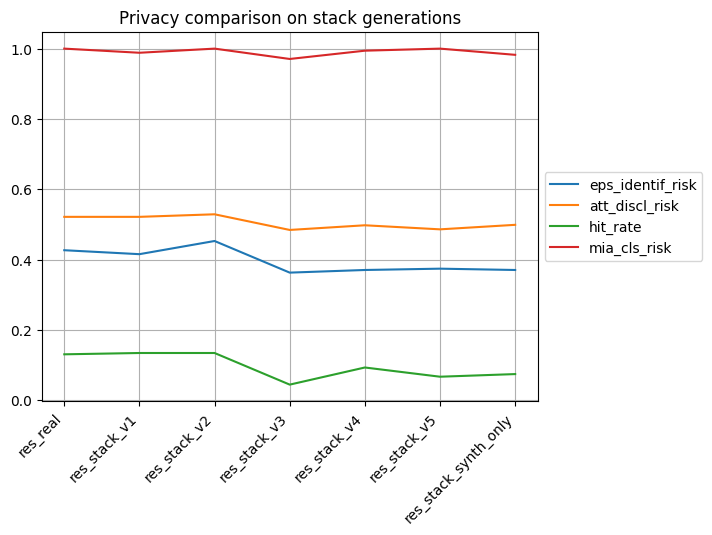

In [18]:
privacy_plot.plot.line()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [19]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

DCR_plot

,median_DCR
res_real,1.295931
res_stack_v1,1.516244
res_stack_v2,1.394256
res_stack_v3,1.671745
res_stack_v4,1.652567
res_stack_v5,1.832238
res_stack_synth_only,1.681967


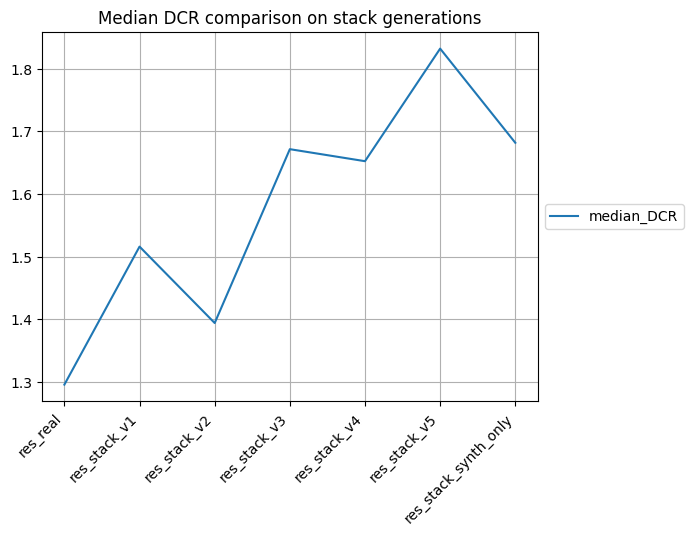

In [20]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [21]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.004826,0.110534,0.120486
res_stack_v1,0.011776,0.135265,0.137697
res_stack_v2,0.016526,0.088656,0.166321
res_stack_v3,0.010469,0.121442,0.138945
res_stack_v4,0.031350,0.141413,0.237135
res_stack_v5,0.016658,0.167501,0.247441
res_stack_synth_only,0.017812,0.115145,0.167252


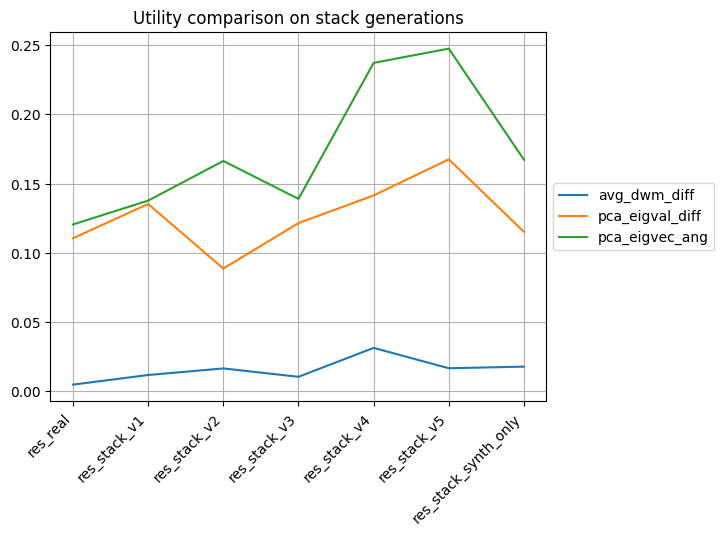

In [22]:
utility_plot.plot.line()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [23]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.948979,0.784344
res_stack_v1,1.177276,0.799544
res_stack_v2,1.067911,0.796463
res_stack_v3,1.166077,0.791601
res_stack_v4,1.446150,0.836803
res_stack_v5,1.435067,0.842514
res_stack_synth_only,1.260202,0.835740


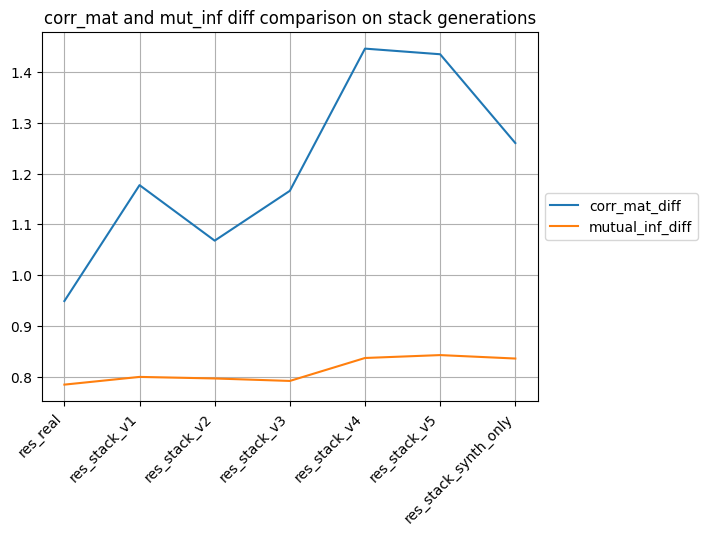

In [24]:
matrix_diff_plot.plot.line()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [25]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.004826,0.110534,0.120486,0.815728,0.948979,0.784344,0.045749,0.000000,0.013485,0.004500,0.745902,0.069469,0.605755,2.459348e-02,0.036565,0.074627,0.131086,0.426966,1.000000,0.521814
res_stack_v1,0.011776,0.135265,0.137697,0.569131,1.177276,0.799544,0.055224,0.000000,0.011544,0.002829,0.748715,0.021065,0.609500,1.363423e-02,0.065391,0.126866,0.134831,0.415730,0.988235,0.521814
res_stack_v2,0.016526,0.088656,0.166321,0.377209,1.067911,0.796463,0.059492,0.000000,0.106479,0.002179,0.748679,0.064126,0.572434,2.433239e-02,0.045667,0.037313,0.134831,0.453184,1.000000,0.529085
res_stack_v3,0.010469,0.121442,0.138945,0.606342,1.166077,0.791601,0.042874,0.000000,0.102715,0.002874,0.780853,0.039112,0.645075,1.686528e-02,0.090042,0.123134,0.044944,0.363296,0.970588,0.484602
res_stack_v4,0.031350,0.141413,0.237135,0.243792,1.446150,0.836803,0.098794,0.285714,0.115541,0.008184,0.775176,0.007836,0.630099,1.506295e-07,0.047816,0.100746,0.093633,0.370787,0.994118,0.497861
res_stack_v5,0.016658,0.167501,0.247441,0.439940,1.435067,0.842514,0.064847,0.000000,0.017000,0.004614,0.747176,-0.009267,0.620372,2.390699e-02,0.062561,0.104478,0.067416,0.374532,1.000000,0.486313
res_stack_synth_only,0.017812,0.115145,0.167252,0.401759,1.260202,0.835740,0.071984,0.142857,0.017558,0.004272,0.774530,0.017710,0.623360,-1.241475e-02,0.090077,0.067164,0.074906,0.370787,0.982353,0.499145


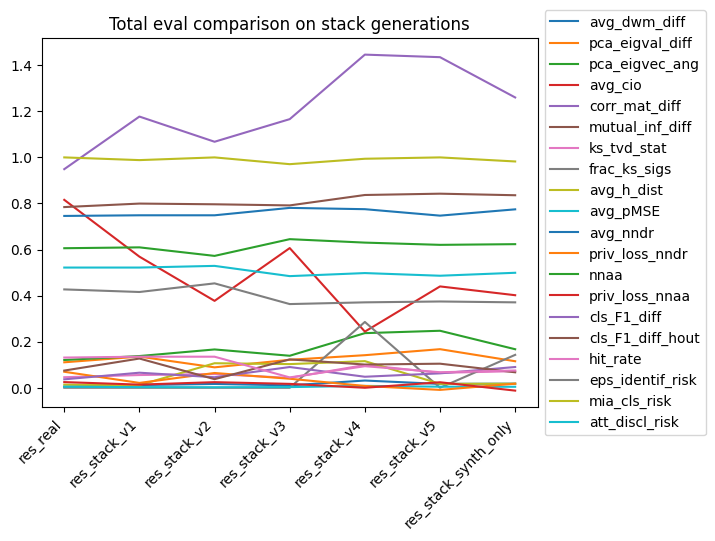

In [26]:
total_eval.plot.line()
plt.title("Total eval comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [27]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.906561,0.679081
1,res_stack_v1,0.877253,0.695181
2,res_stack_v2,0.869246,0.678403
3,res_stack_v3,0.870896,0.724153
4,res_stack_v4,0.813491,0.717519
5,res_stack_v5,0.860065,0.716973
6,res_stack_synth_only,0.852744,0.718791


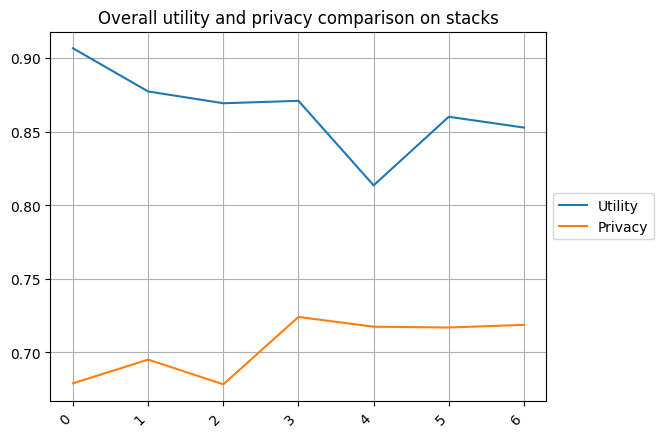

In [28]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()